<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#define-X,y" data-toc-modified-id="define-X,y-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>define X,y</a></span></li><li><span><a href="#create-new-features" data-toc-modified-id="create-new-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>create new features</a></span></li></ul></li><li><span><a href="#Establish-new-a-model-and-train" data-toc-modified-id="Establish-new-a-model-and-train-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Establish new a model and train</a></span></li><li><span><a href="#Evaluate-the-predictions" data-toc-modified-id="Evaluate-the-predictions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate the predictions</a></span></li><li><span><a href="#Visualize-the-desicion-boundary" data-toc-modified-id="Visualize-the-desicion-boundary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualize the desicion boundary</a></span><ul class="toc-item"><li><span><a href="#draw-the-boudary-with-the-original-data-points" data-toc-modified-id="draw-the-boudary-with-the-original-data-points-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>draw the boudary with the original data points</a></span></li><li><span><a href="#draw-the-boudary-with-generated-points" data-toc-modified-id="draw-the-boudary-with-generated-points-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>draw the boudary with generated points</a></span></li></ul></li></ul></div>

# Chip test

**任务:**

1、基于chip_test.csv数据，建立逻辑回归模型(二阶边界)，评估模型表现；  
2、以函数的方式求解边界曲线  
3、描绘出完整的决策边界曲线  

In [1]:
#load data; visualize data;#generate new data
#establish model and train it; predict
#accuracy
#decision boundary
#define f(x)


## Load the data

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


## Visualize the data

In [11]:
mask = data['pass']==1

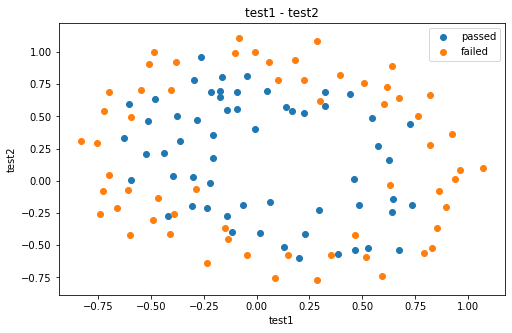

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt 
fig1 = plt.figure(figsize = (8,5))
passed = plt.scatter(data.test1[mask], data.test2[mask])
failed = plt.scatter(data.test1[~mask], data.test2[~mask])
plt.title('test1 - test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed),('passed','failed'))
plt.show()

## Feature engineering

### define X,y

In [17]:
X = data.drop(['pass'],axis =1)
y = data['pass']
X1 = data.test1
X2 = data.test2

### create new features

In [18]:
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
X_new.head()

,X1,X2,X1_2,X2_2,X1_X2
0,0.051267,0.69956,0.002628,0.489384,0.035864
1,-0.092742,0.68494,0.008601,0.469143,-0.063523
2,-0.213710,0.69225,0.045672,0.479210,-0.147941
3,-0.375000,0.50219,0.140625,0.252195,-0.188321
4,0.183760,0.93348,0.033768,0.871385,0.171536


## Establish new a model and train

In [20]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression()
LR2.fit(X_new,y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the predictions

In [21]:
y_predicted = LR2.predict(X_new)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predicted)
accuracy

0.7966101694915254

## Visualize the desicion boundary

### draw the boudary with the original data points

In [27]:
#define f(x)
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
def f(x):
    a = theta4
    b = theta5*x+theta2
    c = theta0+theta1*x+theta3*x*x
    X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    return X2_new_boundary1,X2_new_boundary2

In [28]:
X2_new_boundary1 = []
X2_new_boundary2 = []
for x in X1_new:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


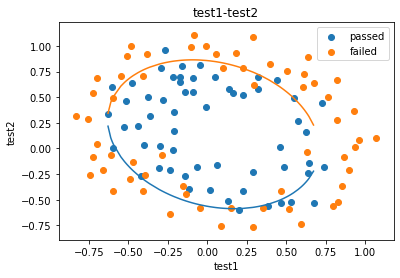

In [29]:
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary1)
plt.plot(X1_new,X2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

### draw the boudary with generated points

In [34]:
X1_range = np.linspace(-.9, 1,10000,endpoint=False)
X2_new_boundary1 = []
X2_new_boundary2 = []
for x in X1_range:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


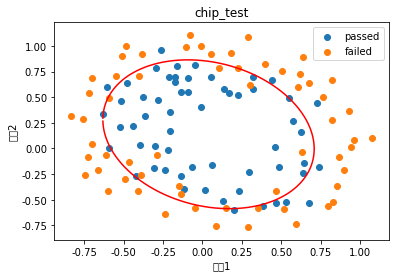

In [35]:
# coding:utf-8
fig4 = plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_range,X2_new_boundary1,'r')
plt.plot(X1_range,X2_new_boundary2,'r')
plt.title('test1-test2')
plt.xlabel('测试1')
plt.ylabel('测试2')
plt.title('chip_test')
plt.legend((passed,failed),('passed','failed'))
plt.show()